# How Linear Regression Works

##### This notebook is a work in progress, and will remain scattered notes while the author focuses on other machine learning algorithms

Recall that the algebraic equation of a line is:

$$
y = mx + b
$$

where $m$ is the slope of the line, and $b$ is the $y$-intercept.  The formulas for $m$ and $b$ are as follows:

$$
\displaystyle m = \frac{\overline{x}\times\overline{y}-\overline{xy}}{(\overline{x})^{2}-\overline{x^2}}
$$

$$
\displaystyle b = \overline{y}-m\overline{x}
$$

In reality, real-world machine learning algorithms often have multi-dimensional features, making their algebraic equation look more like the following:

$$
y = b_{0} + m_{1}b_{1}+m_{2}b_{2}+...+m_{n}b_{n}
$$

where $n$ is the number of dimensions in our features.

# 1. General Setup

In [1]:
# Import analytics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Import machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import support dependencies
import os

We will define these as Numpy arrays, so that we may use mathematical operations thereon.

In [2]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([5, 4, 6, 5, 6, 7])

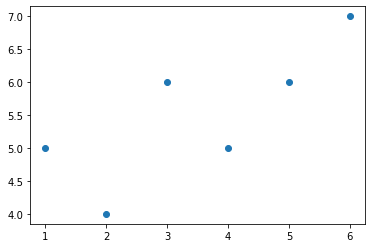

In [3]:
plt.scatter(x,y)

We can define a function to calculate the slope and the $y$-intercept.

In [4]:
def slope_intercept(x, y):
    
    m_numerator = ( (np.mean(x)*np.mean(y)) - np.mean(x*y) )
    m_denominator = ( np.mean(x)**2 - np.mean(x**2))
    
    m = m_numerator / m_denominator
    
    b = np.mean(y) - m  * np.mean(x)
    
    return m, b

We can then pass in the arrays defined earlier, and get the slope and y-intercept of these data points.

In [5]:
m, b = slope_intercept(x, y)

print(f'Slope:{m}\ny-Intercept: {b}')

Slope:0.42857142857142866
y-Intercept: 4.0


Now we will define a function with the slope and y_intercept defined earlier, allowing us to predict any $y$ value given an input $x$ value.

In [6]:
def predict_y(x):
    
    y = (m*x) + b
    
    return y

In [7]:
x_predict = 6.3

y_predict = predict_y(x_predict)

print(y_predict)

6.700000000000001


Then we can populate all the <em>predicted</em> $y$ values from out actual $x$ values.

In [8]:
regression_line = [predict_y(observation) for observation in x]

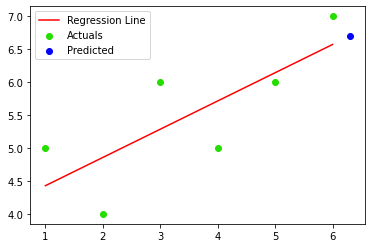

In [9]:
plt.scatter(x, y, color='#25DE00', label='Actuals')
plt.plot(x, regression_line, color='red', label='Regression Line')
plt.scatter(x_predict, y_predict, color='blue', label='Predicted')
plt.legend()

plt.show()

In [10]:
# Raise errors, instead of give warnings
pd.set_option('mode.chained_Assignment', 'raise')

# Define GOOGL data file path
GOOGL_data_file_path = os.path.join('Data','stocks.csv')

# Preview data
stocks = pd.read_csv(GOOGL_data_file_path, index_col='Date')
display(stocks.head())

,Adj. Close,Open-Close Percent Change,High-Low Percent Change,Adj. Volume,Forecast
Date,,,,,
2004-08-19,50.322842,0.324968,8.441017,44659000.0,109.713676
2004-08-20,54.322689,7.227007,8.537313,22834300.0,110.230270
2004-08-23,54.869377,-1.227880,4.062357,18256100.0,110.064759
2004-08-24,52.597363,-5.726357,7.753210,15247300.0,110.340611
2004-08-25,53.164113,1.183658,3.966115,9188600.0,111.489156


In [11]:
X = np.array(stocks.drop(['Forecast'], 1))
y = np.array(stocks['Forecast'])

In [12]:
X[0]

array([5.03228418e+01, 3.24967503e-01, 8.44101709e+00, 4.46590000e+07])

In [13]:
np.mean(X[0])

11164764.772206597

In [14]:
np.mean(X[:,0])

409.05788478499363

In [15]:
np.mean(X[0])

11164764.772206597

In [16]:
np.mean(X, axis=0)

array([ 4.09057885e+02, -2.50302360e-02,  2.15670285e+00,  7.81856760e+06])

In [17]:
np.mean(X, axis=1)

array([11164764.7722066 ,  5708592.5217524 ,  4564039.42596328, ...,
         603636.31964245,   818367.06005411,   735491.32351958])

In [18]:
n = 0
l = 0

for i in X:
    for j in i:
        n+= j
        l += 1

n / l

1954744.696556991

In [19]:
np.mean(X)

1954744.6965569898

In [20]:
import math
forecast_out = math.ceil(0.05*len(stocks))

In [21]:
X_known = X[:-forecast_out]
y_known = y[:-forecast_out]

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
# Initialize scaler
scaler = StandardScaler()

# Fit data to scaler
scaler.fit(X_known, y_known)

# Scale features
X_known = scaler.transform(X_known)


X_train, x_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2)

In [24]:
m, b = slope_intercept(X_train, y_train)

ValueError: operands could not be broadcast together with shapes (2601,4) (2601,) 

# Sources:

1. <a href='https://pythonprogramming.net/simple-linear-regression-machine-learning-tutorial/' target='_blank'>Regression - Theory and how it works</a>
2. <a href='https://medium.com/analytics-vidhya/how-does-linear-regression-work-implementation-with-sklearn-e5a850eddc89' target='_blank'>How does Linear Regression work? Implementation with sklearn.
</a>
3. <a href='https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html' target='_blank'>A Beginner’s Guide to Linear Regression in Python with Scikit-Learn</a>
4. <a href='https://www.educative.io/edpresso/a-deep-dive-into-linear-regression-3-way-implementation' target='_blank'>A deep dive into linear regression (3-way implementation)</a>
5. <a href='https://medium.com/@ktv0303/simple-linear-regression-or-linear-regression-with-one-variable-2c37d5ba4fe' target='_blank'>Simple Linear Regression or Linear Regression with One Variable</a>
6. <a href='https://medium.com/@sdoshi579/linear-regression-from-basic-bfe2be9e06ea' target='_blank'>Linear Regression from basic</a>
7. <a href='https://stackabuse.com/linear-regression-in-python-with-scikit-learn/' target='_blank'>Linear Regression in Python with Scikit-Learn</a>